<a href="https://colab.research.google.com/github/psnana-us/week5/blob/main/logistic_regression_telecom_analysis_with_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [7]:
# Load dataset
df = pd.read_csv("telecom_churn.csv")

In [8]:
# Encode categorical features
label_encoders = {}
for col in ['International plan', 'Voice mail plan']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
# Drop unused columns
df.drop(['State', 'Area code'], axis=1, inplace=True)

In [10]:
# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [11]:
# Check for class imbalance
print("Class Distribution:\n", y.value_counts())

Class Distribution:
 Churn
False    2850
True      483
Name: count, dtype: int64


In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [14]:
# Measure training time
start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.4f} seconds.")

Training completed in 0.0220 seconds.


In [15]:
# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [16]:
# Evaluation Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.3f}")


Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       857
        True       0.56      0.22      0.31       143

    accuracy                           0.86      1000
   macro avg       0.72      0.59      0.62      1000
weighted avg       0.84      0.86      0.84      1000


Confusion Matrix:
 [[833  24]
 [112  31]]

ROC AUC Score: 0.831


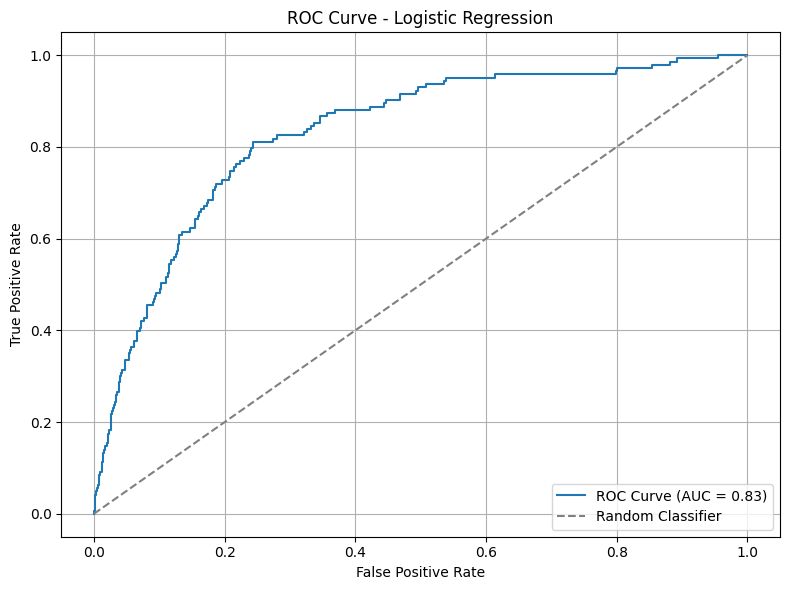

In [17]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

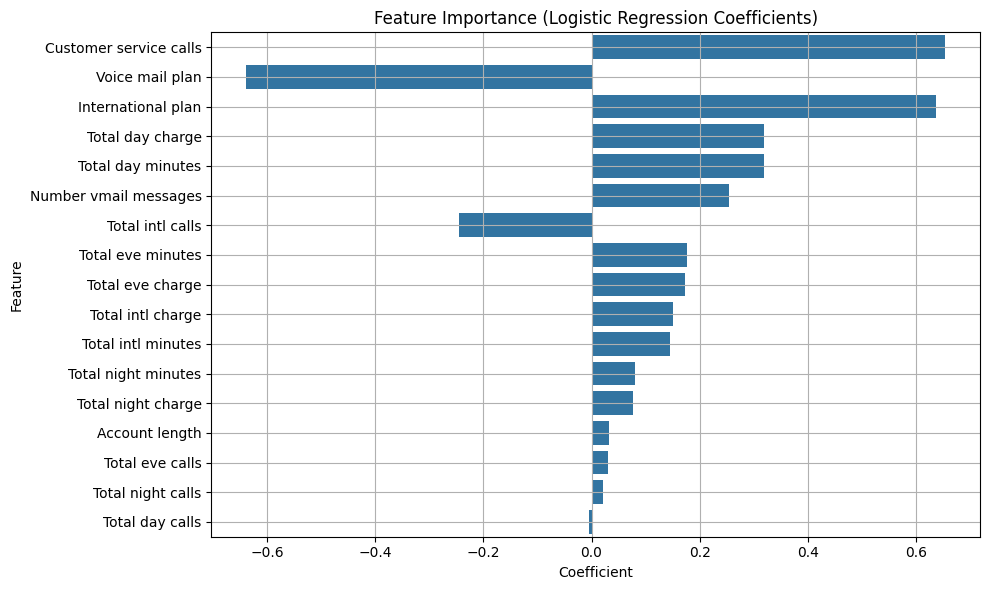

In [19]:
# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# ANALYSIS
print("\n\n----- MODEL ANALYSIS -----\n")



----- MODEL ANALYSIS -----



In [21]:
# 1. Is the model good at handling imbalanced classes?
print("1. Imbalanced Classes:")
print("- Churn is a minority class.")
print("- Recall for churned customers is low, indicating poor sensitivity to minority class.")
print("- Logistic Regression requires class_weight='balanced' or resampling techniques to perform better in such cases.\n")

1. Imbalanced Classes:
- Churn is a minority class.
- Recall for churned customers is low, indicating poor sensitivity to minority class.
- Logistic Regression requires class_weight='balanced' or resampling techniques to perform better in such cases.



In [22]:
# 2. Does the model train quickly?
print("2. Training Speed:")
print(f"- Model training time: {training_time:.4f} seconds.")
print("- Logistic Regression trains very fast on medium-sized datasets.\n")

2. Training Speed:
- Model training time: 0.0220 seconds.
- Logistic Regression trains very fast on medium-sized datasets.



In [23]:
# 3. Does the model yield interpretable results?
print("3. Interpretability:")
print("- Coefficients of the model indicate direction and magnitude of feature influence.")
print("- Simple to explain to stakeholders, making it a very interpretable model.\n")

3. Interpretability:
- Coefficients of the model indicate direction and magnitude of feature influence.
- Simple to explain to stakeholders, making it a very interpretable model.

